# Importing the necessary packages and data


In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
main_df=pd.read_pickle('Data/df_of_imdb_data.pkl')

y=main_df['is_nominee'].copy()

# Making the train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(main_df.copy(), y,
                                                       shuffle=True,
                                                       random_state=126029,
                                                       test_size=.2,
                                                       stratify=y
                                                   )

# Splitting the genre info

In [120]:
X_train['genres'].explode().value_counts()

Animation      3120
Family         1050
Adventure      1043
Comedy          888
Fantasy         822
Action          601
Drama           548
Sci-Fi          482
Romance         186
Mystery         152
Thriller        150
Musical         148
Horror          126
Crime            97
Music            82
History          69
War              52
Sport            48
Biography        45
Western          16
Documentary       1
Name: genres, dtype: int64

In [49]:
def get_genres_df(df):
    '''input the dataframe of movie info (df)
    outputs dataframe:
    a dataframe with imdb_id,  one-hot encoding for genres EXCEPT animation'''
    genres_df= pd.DataFrame({'imdb_id': [],
                        'Family':[],
                        'Adventure':[] ,
                        'Comedy':[],
                        'Fantasy':[],
                        'Action':[],
                        'Drama':[],
                        'Sci-Fi':[],
                        'Romance':[],
                        'Mystery':[],
                        'Thriller':[],
                        'Musical':[],
                        'Horror':[],
                        'Crime':[],
                        'Music':[],
                        'History':[],
                        'War':[],
                        'Sport':[],
                        'Biography':[],
                        'Western':[],
                        'Documentary':[],
                        'Game-Show':[]})
    for i in range(0, len(df)):
        row=df.iloc[i]
        newrow=pd.DataFrame({'imdb_id': [row['imdb_id']],
                        'Family':[0],
                        'Adventure':[0] ,
                        'Comedy':[0],
                        'Fantasy':[0],
                        'Action':[0],
                        'Drama':[0],
                        'Sci-Fi':[0],
                        'Romance':[0],
                        'Mystery':[0],
                        'Thriller':[0],
                        'Musical':[0],
                        'Horror':[0],
                        'Crime':[0],
                        'Music':[0],
                        'History':[0],
                        'War':[0],
                        'Sport':[0],
                        'Biography':[0],
                        'Western':[0],
                        'Documentary':[0],
                        'Game-Show':[0]})
        
        for genre in row['genres']:
            if genre == 'Animation':
                pass
            else:
                newrow.iloc[0, newrow.columns.get_loc(genre)] = int(1)
        genres_df=pd.concat([genres_df, newrow],ignore_index=True )
    return(genres_df)

In [50]:
genres_df = get_genres_df(X_train)

In [51]:
genres_df.head()

,imdb_id,Family,Adventure,Comedy,Fantasy,Action,Drama,Sci-Fi,Romance,Mystery,...,Horror,Crime,Music,History,War,Sport,Biography,Western,Documentary,Game-Show
0,2509428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0206367,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5480816,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0455142,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11457742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It has occurred to me that I want a dataframe of just the nominees.

In [66]:
nominee_genres= pd.DataFrame({'imdb_id': [],
                    'Family':[],
                    'Adventure':[] ,
                    'Comedy':[],
                    'Fantasy':[],
                    'Action':[],
                    'Drama':[],
                    'Sci-Fi':[],
                    'Romance':[],
                    'Mystery':[],
                    'Thriller':[],
                    'Musical':[],
                    'Horror':[],
                    'Crime':[],
                    'Music':[],
                    'History':[],
                    'War':[],
                    'Sport':[],
                    'Biography':[],
                    'Western':[],
                    'Documentary':[],
                    'Game-Show':[]})
for i in range(len(genres_df)):
    if X_train.iloc[i]['is_nominee'] ==1:
        nominee_genres.loc[len(nominee_genres.index)] = genres_df.iloc[i]
        
nominee_genres.head()    

,imdb_id,Family,Adventure,Comedy,Fantasy,Action,Drama,Sci-Fi,Romance,Mystery,...,Horror,Crime,Music,History,War,Sport,Biography,Western,Documentary,Game-Show
0,0432283,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0382932,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2321405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0166813,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3606756,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
nominee_genres.head()

,imdb_id,Family,Adventure,Comedy,Fantasy,Action,Drama,Sci-Fi,Romance,Mystery,...,Horror,Crime,Music,History,War,Sport,Biography,Western,Documentary,Game-Show
0,0432283,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0382932,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2321405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0166813,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3606756,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualizing the data

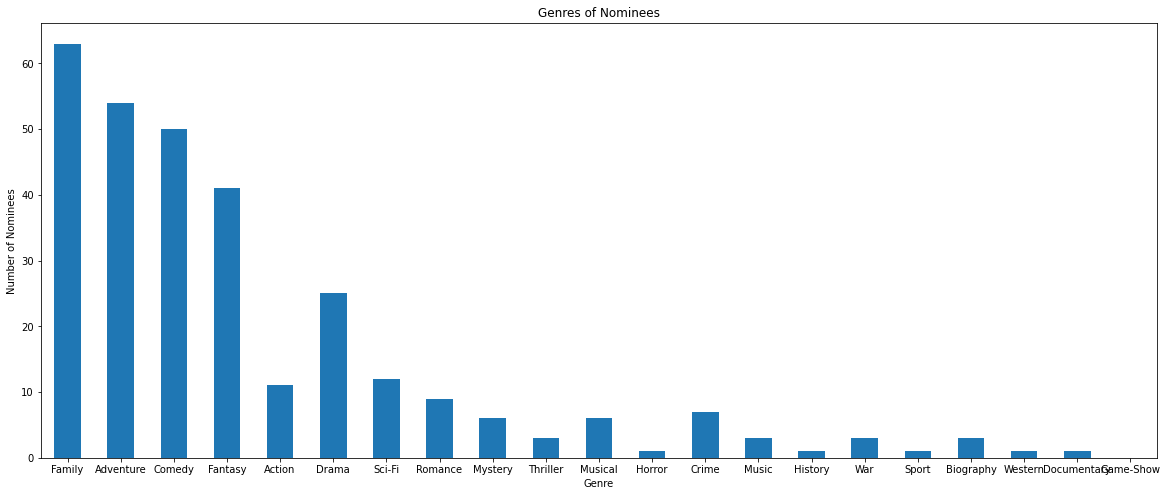

In [98]:
#What genres are the nominated movies?
toplot=nominee_genres.drop('imdb_id', axis=1).sum(axis=0)

ax=toplot.plot.bar(xlabel='Genre', ylabel='Number of Nominees', rot=0, figsize=(20,8),
                    title='Genres of Nominees')

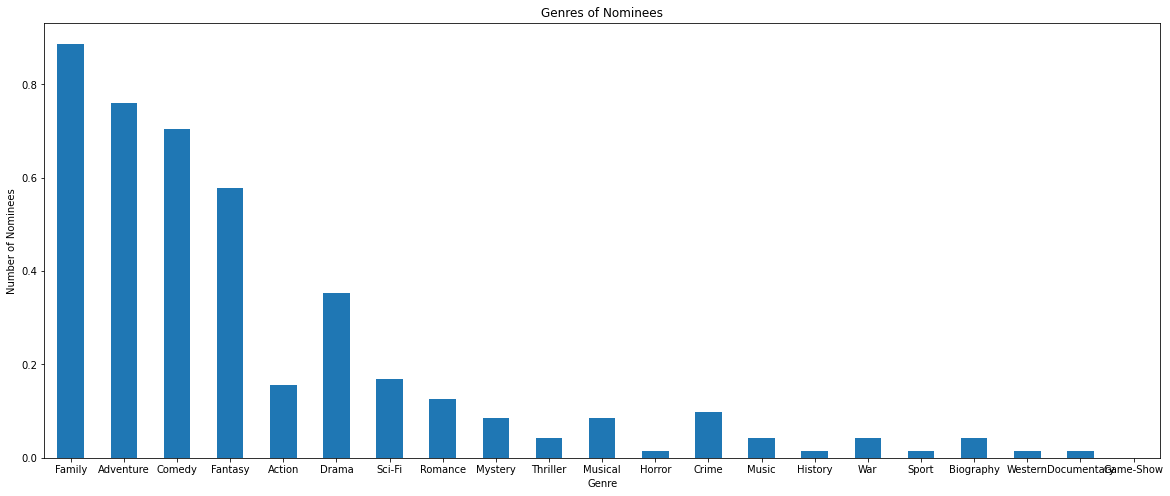

In [109]:
#What genres are the nominated movies, proportionately?
toplot=nominee_genres.drop('imdb_id', axis=1).sum(axis=0)/len(nominee_genres)

ax=toplot.plot.bar(xlabel='Genre', ylabel='Proportion of Nominees', rot=0, figsize=(20,8),
                    title='Genres of Nominees')

#This is the exact same picture as above, just scaled differently.  It doesn't tell us any new information.

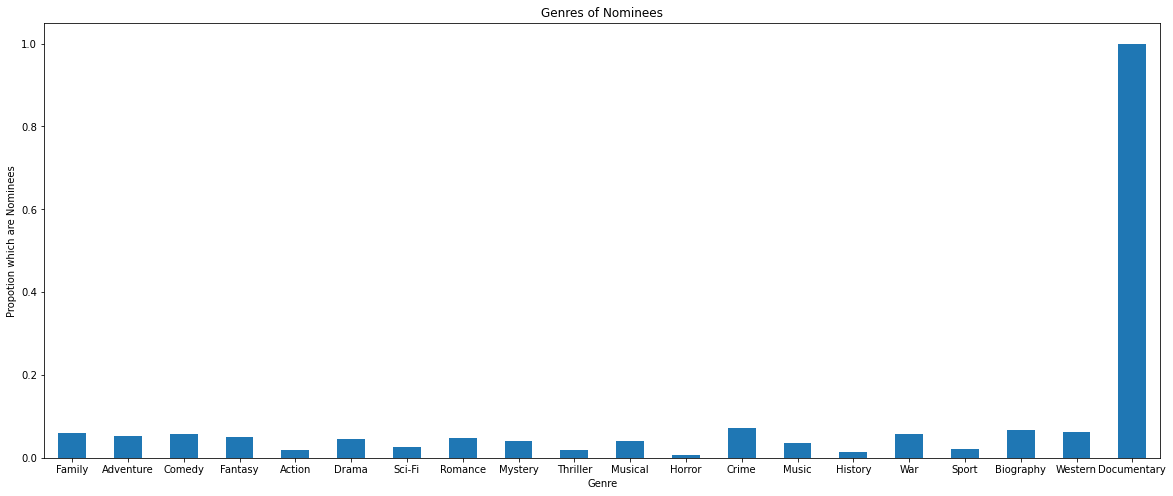

In [99]:
#What proportion of all movies of a given genre are nominees?
toplot=nominee_genres.drop(['imdb_id','Game-Show'], axis=1).sum(axis=0)
toplot2=genres_df.drop(['imdb_id','Game-Show'], axis=1).sum(axis=0)

toplot3=toplot/toplot2

ax=toplot3.plot.bar(xlabel='Genre', ylabel='Propotion Which Are Nominees', rot=0, figsize=(20,8),
                    title='Proportionate Genres of Nominees')

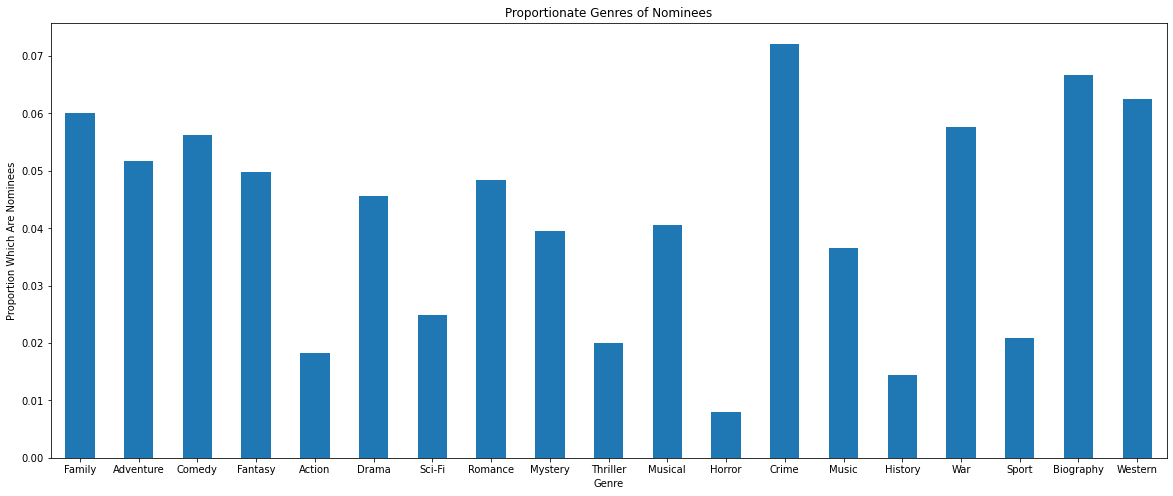

In [111]:
#Excluding the one documentary
toplot=nominee_genres.drop(['imdb_id','Game-Show','Documentary'], axis=1).sum(axis=0)
toplot2=genres_df.drop(['imdb_id','Game-Show','Documentary'], axis=1).sum(axis=0)

toplot3=toplot/toplot2

ax=toplot3.plot.bar(xlabel='Genre', ylabel='Proportion Which Are Nominees', rot=0, figsize=(20,8),
                    title='Proportionate Genres of Nominees')

# Using only the genres Family, Adventure, Comedy, Fantasy, Action, Drama, Sci-Fi, and Other   

In [114]:
def get_genres_df2(df):
    '''input the dataframe of movie info (df)
    outputs dataframe:
    a dataframe with imdb_id,  one-hot encoding for genres EXCEPT animation and other category for smaller genres'''
    genres_df= pd.DataFrame({'imdb_id': [],
                        'Family':[],
                        'Adventure':[] ,
                        'Comedy':[],
                        'Fantasy':[],
                        'Action':[],
                        'Drama':[],
                        'Sci-Fi':[],
                        'Other':[]
                            })
    for i in range(0, len(df)):
        row=df.iloc[i]
        newrow=pd.DataFrame({'imdb_id': [row['imdb_id']],
                        'Family':[0],
                        'Adventure':[0] ,
                        'Comedy':[0],
                        'Fantasy':[0],
                        'Action':[0],
                        'Drama':[0],
                        'Sci-Fi':[0],
                        'Other':[0]
                            })
        
        for genre in row['genres']:
            if genre == 'Animation':
                pass
            elif genre not in ['Family','Adventure','Comedy','Fantasy','Action', 'Drama','Sci-Fi']:
                newrow.iloc[0, newrow.columns.get_loc('Other')] = int(1)
            else:
                newrow.iloc[0, newrow.columns.get_loc(genre)] = int(1)
        genres_df=pd.concat([genres_df, newrow],ignore_index=True )
    return(genres_df)

In [115]:
genres_df2 = get_genres_df2(X_train)

In [116]:
nominee_genres2= pd.DataFrame({'imdb_id': [],
                    'Family':[],
                    'Adventure':[] ,
                    'Comedy':[],
                    'Fantasy':[],
                    'Action':[],
                    'Drama':[],
                    'Sci-Fi':[],
                    'Other':[]
                              })
for i in range(len(genres_df)):
    if X_train.iloc[i]['is_nominee'] ==1:
        nominee_genres2.loc[len(nominee_genres2.index)] = genres_df2.iloc[i]
        
nominee_genres2.head()    

,imdb_id,Family,Adventure,Comedy,Fantasy,Action,Drama,Sci-Fi,Other
0,0432283,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0382932,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2321405,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0166813,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,3606756,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# Visualizing the data with Other category

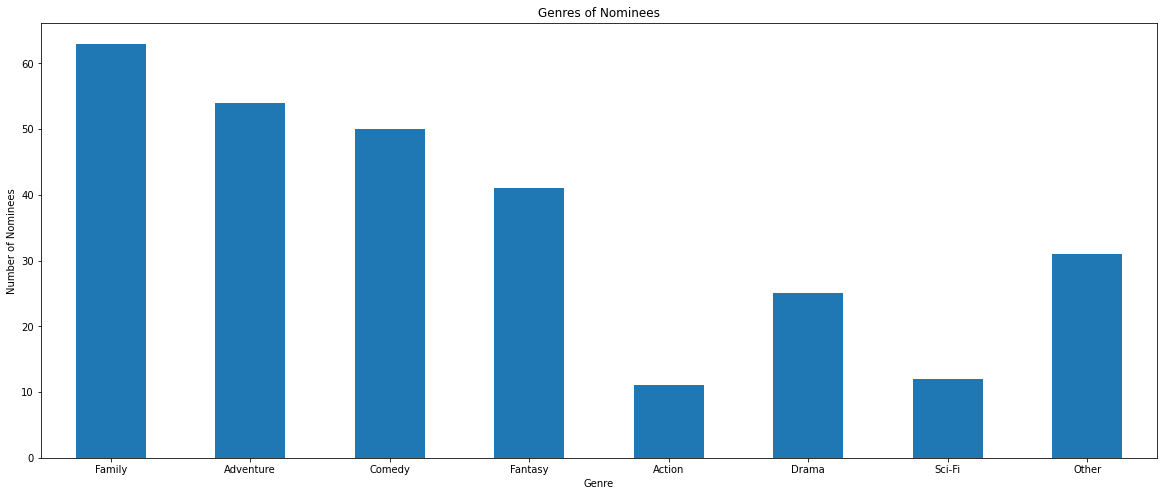

In [117]:
#What genres are the nominated movies?
toplot=nominee_genres2.drop('imdb_id', axis=1).sum(axis=0)

ax=toplot.plot.bar(xlabel='Genre', ylabel='Number of Nominees', rot=0, figsize=(20,8),
                    title='Genres of Nominees')

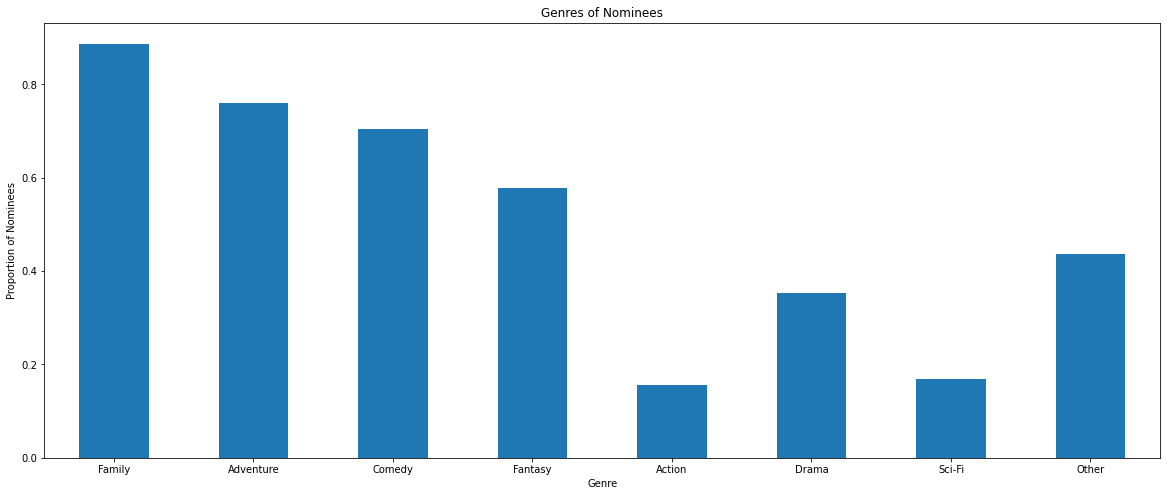

In [118]:
#What genres are the nominated movies, proportionately?
toplot=nominee_genres2.drop('imdb_id', axis=1).sum(axis=0)/len(nominee_genres2)

ax=toplot.plot.bar(xlabel='Genre', ylabel='Proportion of Nominees', rot=0, figsize=(20,8),
                    title='Genres of Nominees')

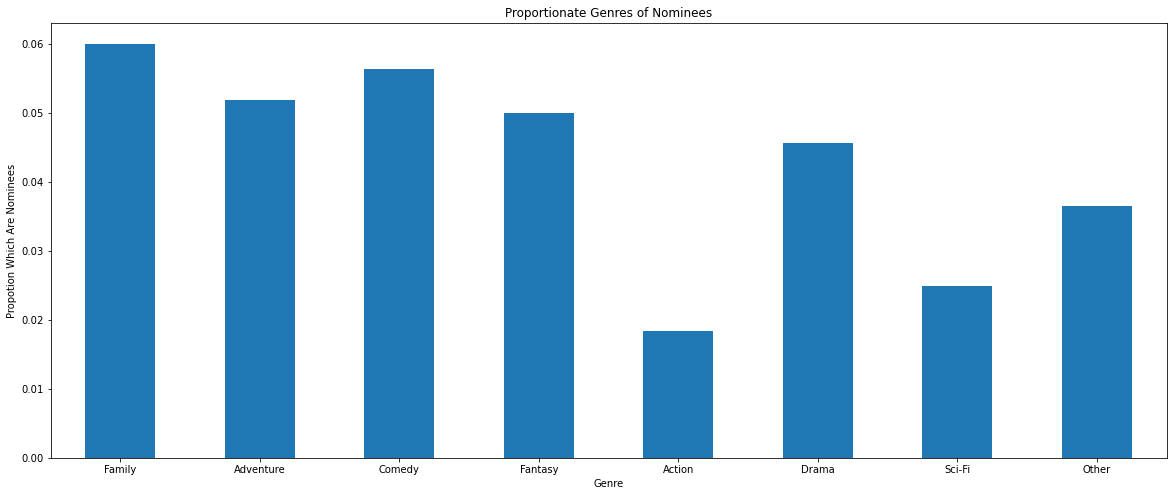

In [119]:
#What proportion of all movies of a given genre are nominees?
toplot=nominee_genres2.drop(['imdb_id'], axis=1).sum(axis=0)
toplot2=genres_df2.drop(['imdb_id'], axis=1).sum(axis=0)

toplot3=toplot/toplot2

ax=toplot3.plot.bar(xlabel='Genre', ylabel='Propotion Which Are Nominees', rot=0, figsize=(20,8),
                    title='Proportionate Genres of Nominees')